# Control Flow Automaton (CFA)

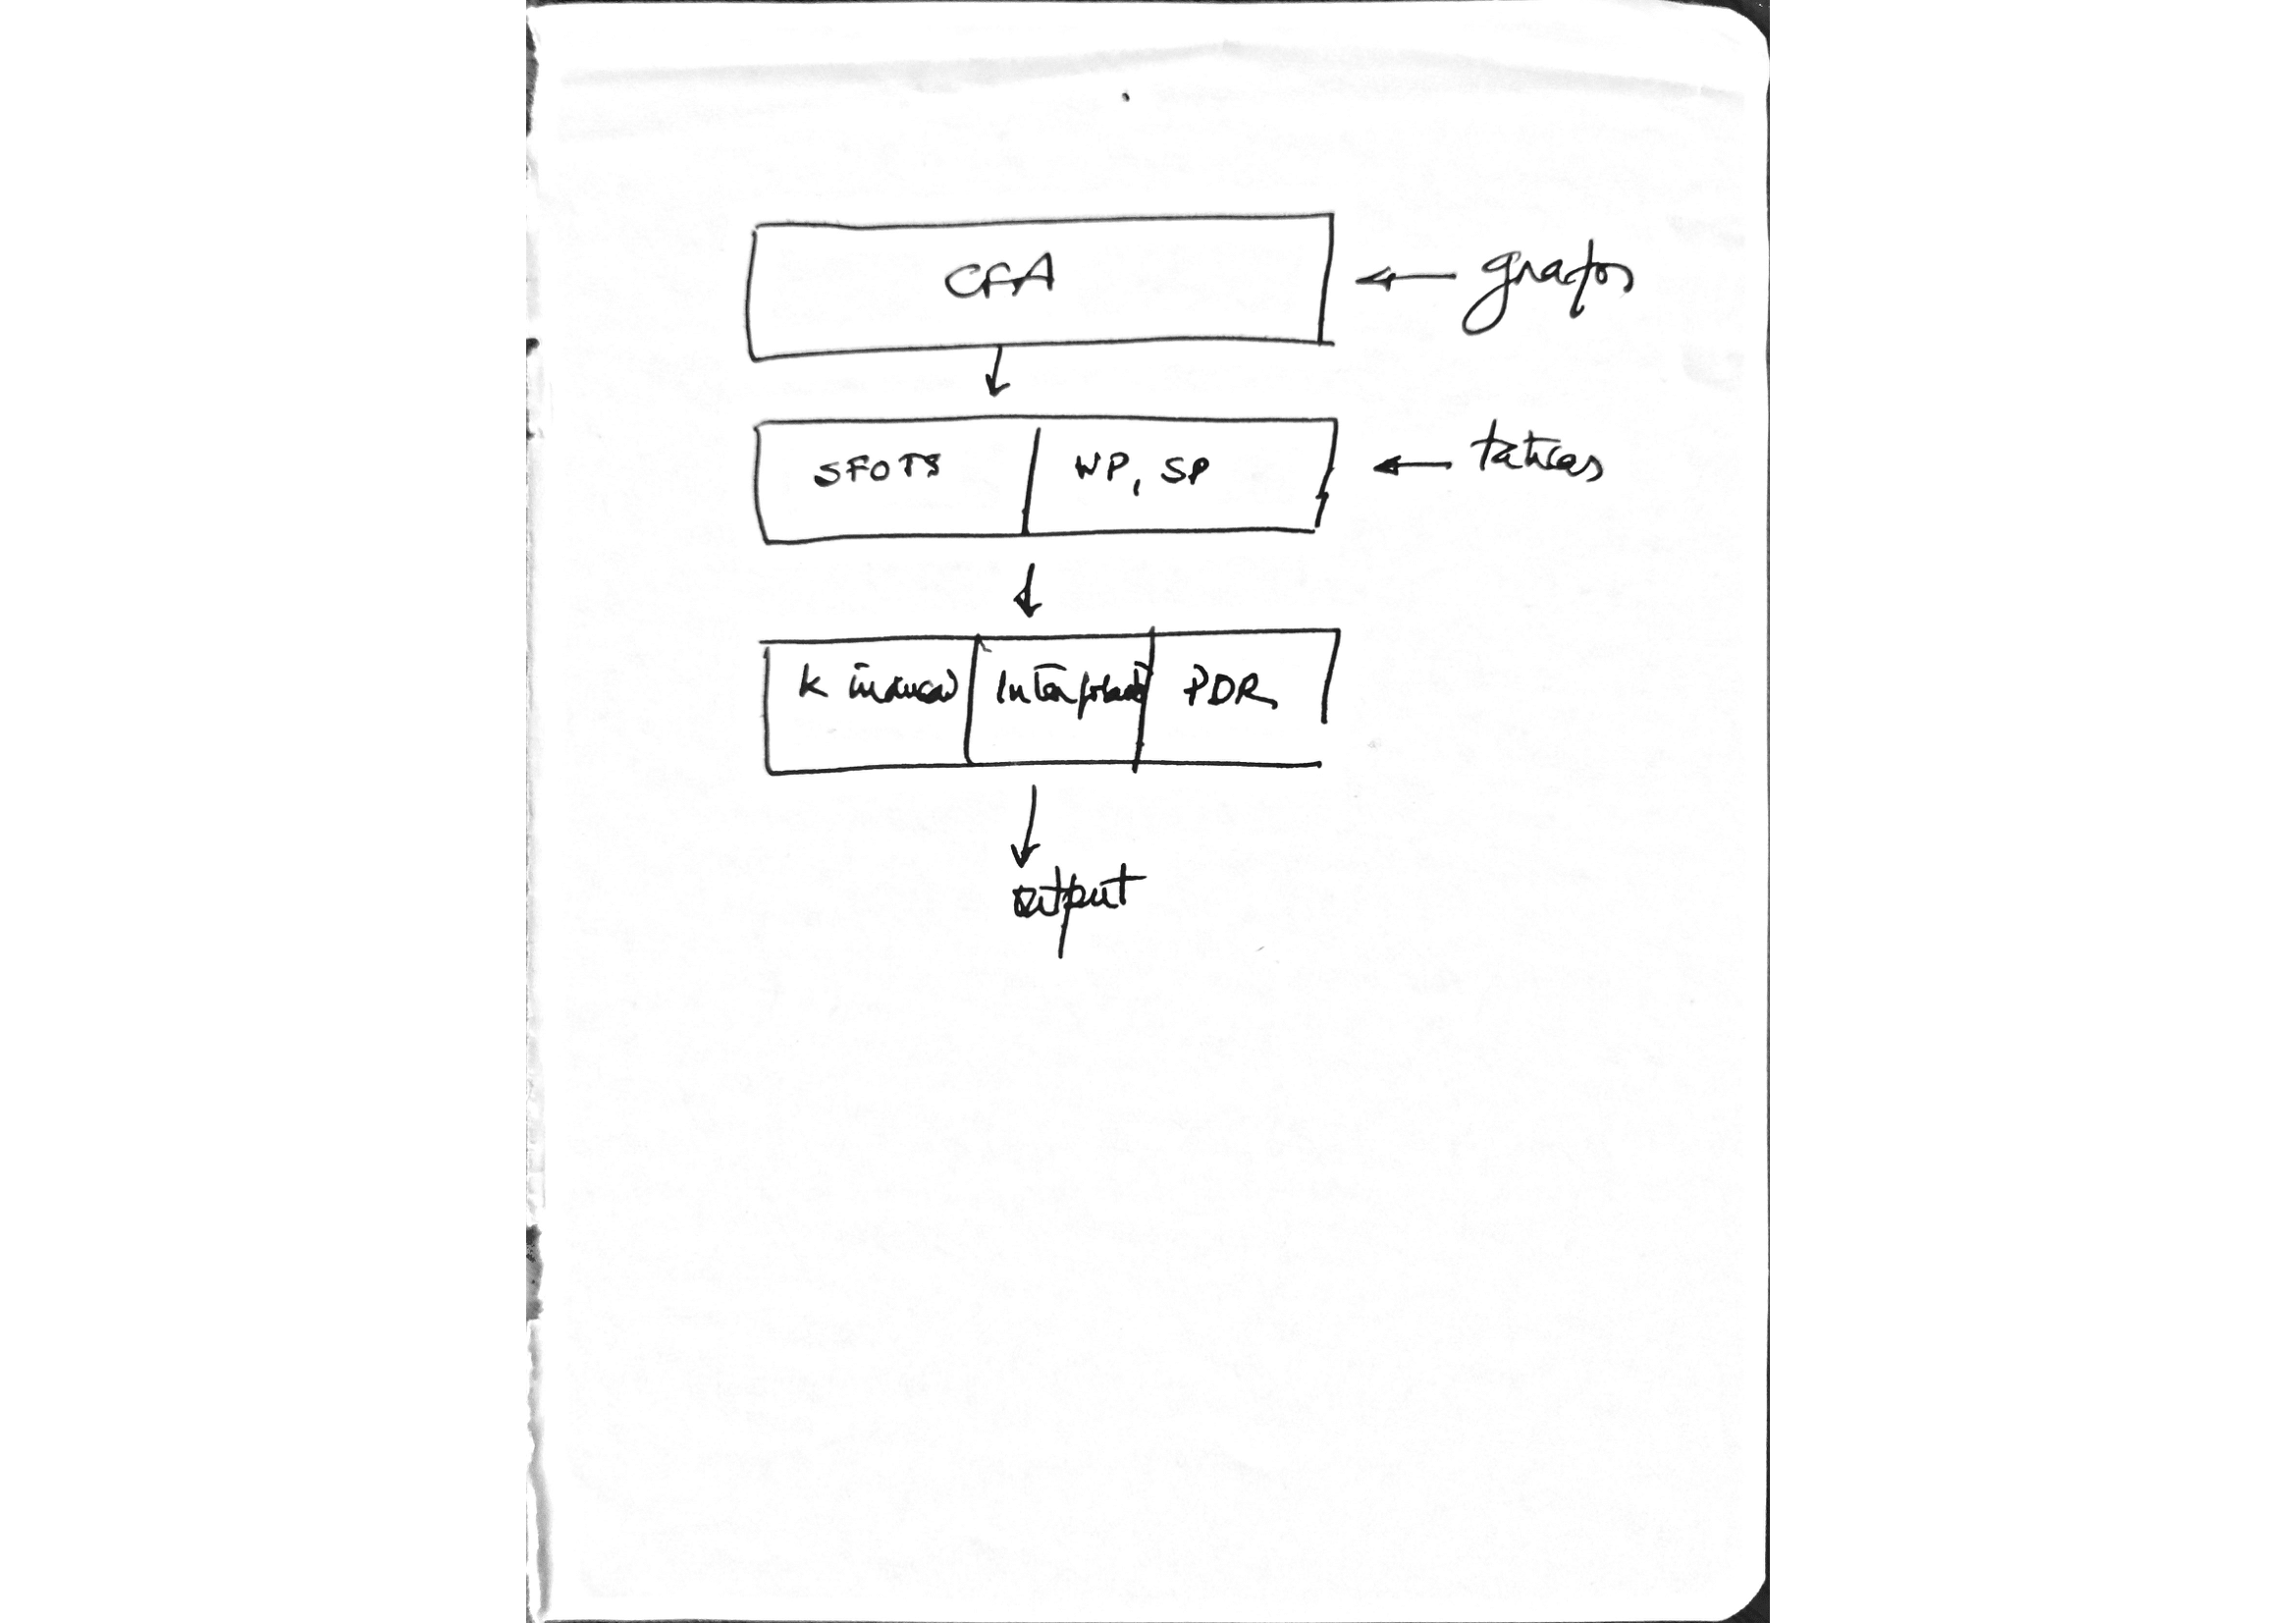

## Multiplicação de dois inteiros

<div>
<img src="attachment:automato.png" width="500"/>
</div>

## Problema representado num autómato

<div>
<img src="attachment:331349975_1393097071431349_1603397457403138661_n.png" width="500"/>
</div>

## Grafo representado com recurso ao NetworkX

### Parsing 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def cfa_to_networkX(cfa):
    edge_list = []
    edge_labels = {}
    for node, (_, transitions) in cfa.items():
        for targetNode, cond in transitions:
            edge = (node, targetNode)
            edge_labels[edge] = cond if cond != "" else "True"
            edge_list.append(edge)
    return edge_list, edge_labels

In [18]:
def draw_cfa(edge_list, edge_labels):
    G = nx.MultiDiGraph()
    G.add_edges_from(edge_list)
    pos = nx.nx_pydot.graphviz_layout(G, prog="dot")
    rad = 0.3

    straight_edges = [(ini, to) for ini, to in edge_list if (to, ini) not in edge_list or to == ini]
    curved_edges = list(set(edge_list) - set(straight_edges))

    fig, ax = plt.subplots(figsize=(24, 32))
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, node_size=6000, labels=edge_list)
    nx.draw_networkx_labels(G, pos=pos, font_size=18)
    nx.draw_networkx_edges(
        G, pos=pos, ax=ax, edgelist=curved_edges, node_size=6000, width=5.0,
        arrowsize=50, connectionstyle=f'arc3, rad={rad}'
    )
    nx.draw_networkx_edges(
        G, pos=pos, ax=ax, edgelist=straight_edges, node_size=6000, width=5.0,
        arrowsize=50
    )

    label_pos  = 0.5
    text_items = {}
    for (n1, n2), label in edge_labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        (x, y) = (
            x1 * label_pos + x2 * (1.0 - label_pos),
            y1 * label_pos + y2 * (1.0 - label_pos),
        )
        pos_1 = ax.transData.transform(np.array(pos[n1]))
        pos_2 = ax.transData.transform(np.array(pos[n2]))
        linear_mid = 0.5*pos_1 + 0.5*pos_2
        d_pos = pos_2 - pos_1
        rotation_matrix = np.array([(0,1), (-1,0)])
        ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
        ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
        ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
        bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
        (x, y) = ax.transData.inverted().transform(bezier_mid)

        trans_angle = 0.0

        if not isinstance(label, str):
            label = str(label)  # this makes "1" and 1 labeled the same

        if (n1,n2) not in curved_edges:
            (x, y) = (
                x1 * label_pos + x2 * (1.0 - label_pos),
                y1 * label_pos + y2 * (1.0 - label_pos),
            )

        t = ax.text(
            x-(len(label)*0.7) ,
            y,
            label,
            size=16,
            rotation=trans_angle,
            transform=ax.transData,
            bbox=dict(boxstyle="round", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)),
            zorder=1,
        )
        text_items[(n1, n2)] = t


    plt.axis('off')
    plt.show()

[('init', 'switch'), ('switch', 'end'), ('isEven', 'overflow'), ('end', 'end'), ('overflow', 'overflow')]


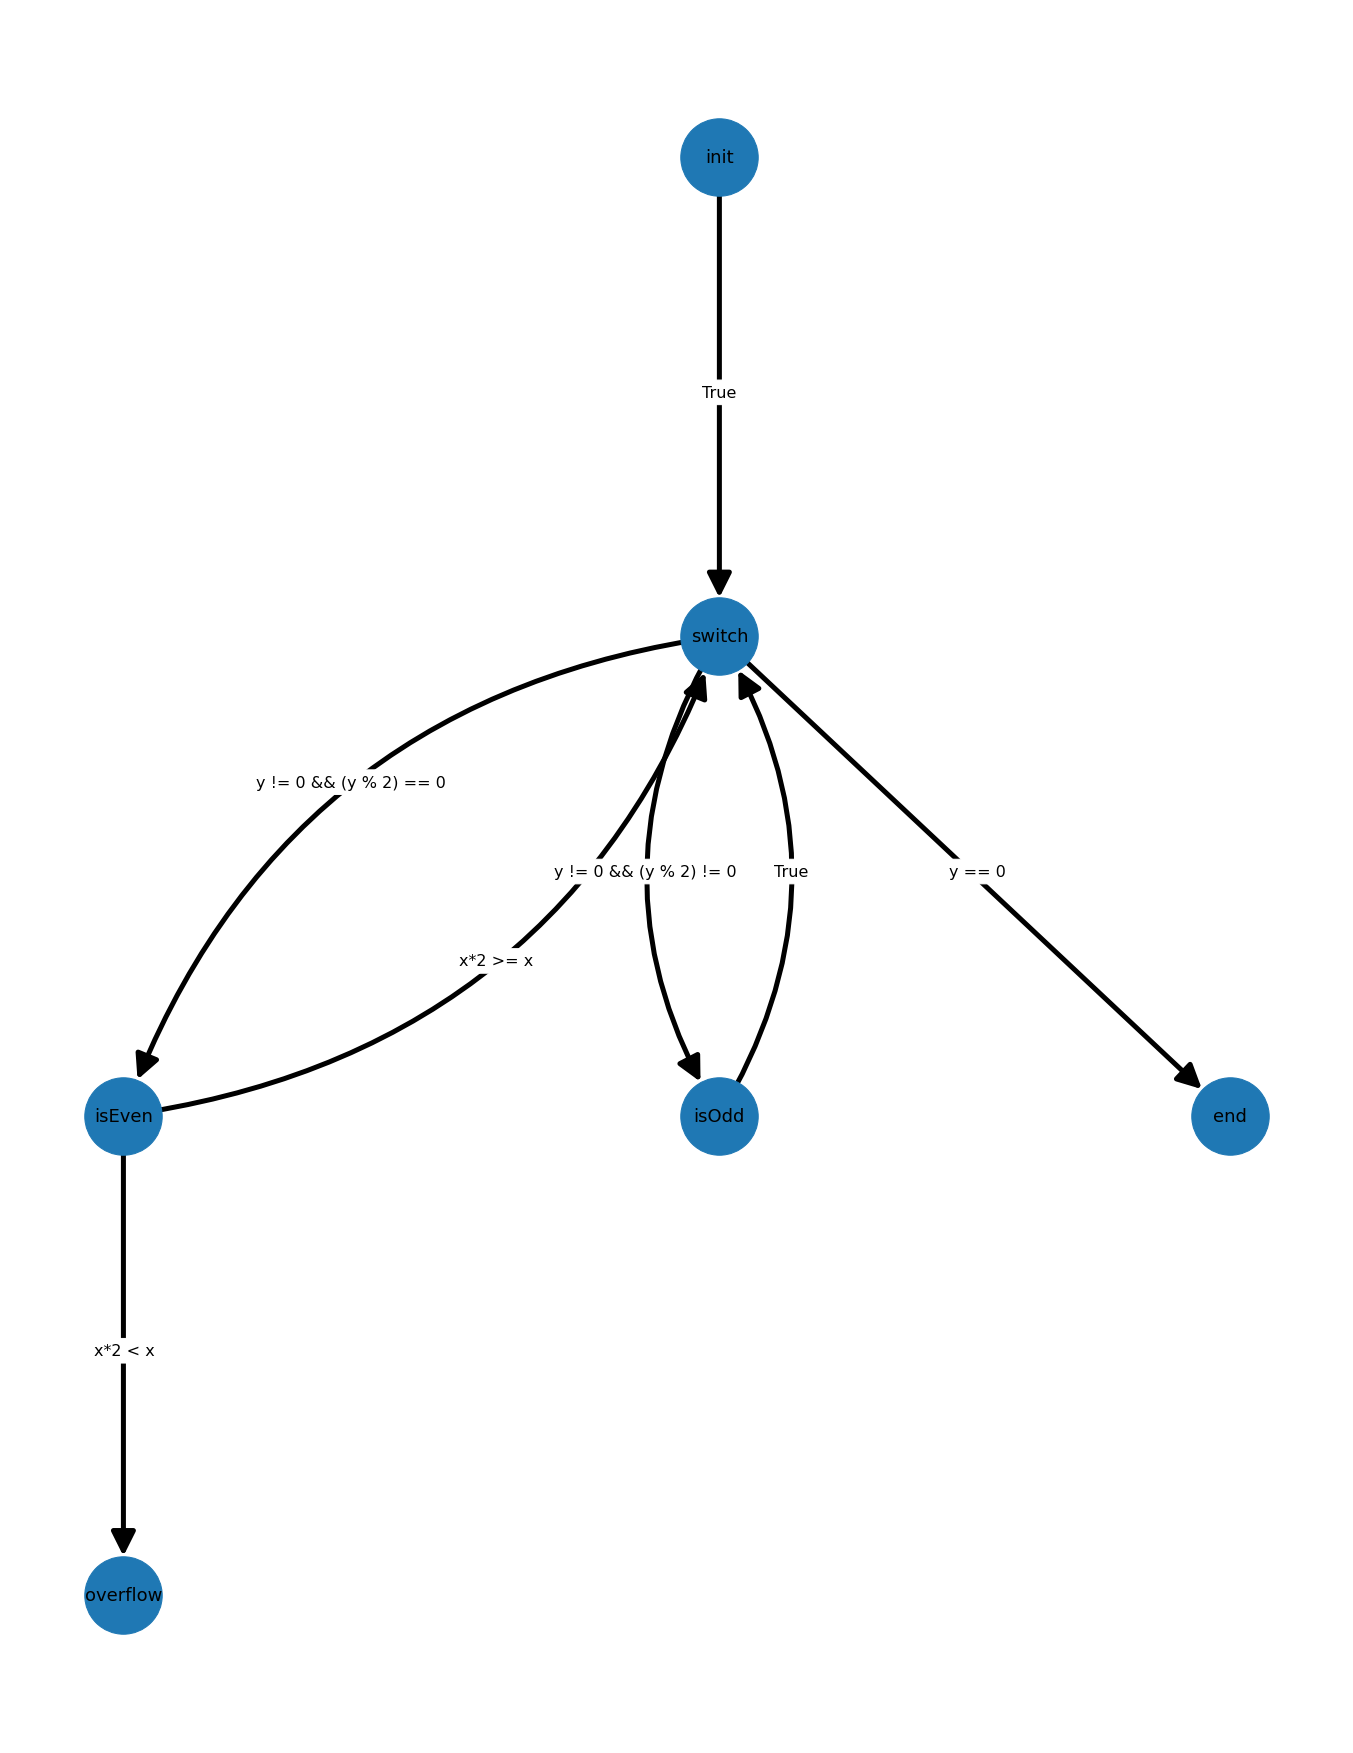

In [21]:
cfa = {
    "init": (
        "x = 2; y = 4; z = 0;",
        [("switch", "")]
    ),
    "switch": (
        "",
        [("isEven", "y != 0 && (y % 2) == 0"), ("isOdd", "y != 0 && (y % 2) != 0"), ("end", "y == 0")]
    ),
    "isEven": (
        "x = 2 * x; y = y / 2;",
        [("switch", "x*2 >= x"), ("overflow", "x*2 < x")]
    ),
    "isOdd": (
        "y = y - 1; z = z + x;",
        [("switch", "")]
    ),
    "end": (
        "",
        [("end", "")]
    ),
    "overflow": (
        "",
        [("overflow", "")]
    )
}

cfa_to_networkX(cfa)
draw_cfa(*cfa_to_networkX(cfa))